<a href="https://colab.research.google.com/github/aabiddr1/spring-petclinic/blob/master/zenithcode_Data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Loading
Write a Python script to upload a CSV file into this Colab environment using a file upload widget.

Load it into a pandas DataFrame called 'df'.

After loading, display the first few rows of df formatted as a clean table.

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Read the CSV file into a pandas DataFrame
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
display(df.head())

Saving marketing_campaign_performance.csv to marketing_campaign_performance.csv
User uploaded file "marketing_campaign_performance.csv" with length 15209 bytes

First few rows of the DataFrame:


,campaign_id,campaign_name,marketing_channel,campaign_start_date,campaign_end_date,spend_usd,impressions,clicks,conversions,revenue_usd
0,CAMP_1001,Email Brand Awareness 2022,LinkedIn,26-09-2024,15-12-2024,689.42,8830.0,429.0,0.0,0
1,CAMP_1002,Email Q1 Promo 2023,google ads,15-02-2025,12-05-2025,2849.61,54100.0,2233.0,369.0,11901.52
2,CAMP_1003,linkedin Brand Awareness 2022,Influencer,13-05-2024,02-08-2024,9852.51,227841.0,3671.0,14.0,236.34
3,CAMP_1004,Google Product Launch 2022,Influencer Marketing,16-05-2024,08-08-2024,11597.92,426227.0,7207.0,566.0,21080.05
4,CAMP_1005,facebook Product Launch 2022,Email,09-06-2024,05-07-2024,2234.33,56741.0,826.0,23.0,1016.67


In [2]:
# 1. Dimensions (shape) of the DataFrame
print("1. Dimensions of the DataFrame:")
print(df.shape)
print("\n\n")

# 2. Concise summary from df.info()
print("2. Concise summary (df.info()):")
df.info()
print("\n\n")

# 3. Statistical summary for numeric columns (df.describe())
print("3. Statistical summary for numeric columns (df.describe()):")
display(df.describe())
print("\n\n")

# 4. Total count of missing (null) values for every column, sorted descending
print("4. Total count of missing (null) values per column:")
display(df.isnull().sum().sort_values(ascending=False))

1. Dimensions of the DataFrame:
(150, 10)



2. Concise summary (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_id          150 non-null    object 
 1   campaign_name        150 non-null    object 
 2   marketing_channel    150 non-null    object 
 3   campaign_start_date  150 non-null    object 
 4   campaign_end_date    150 non-null    object 
 5   spend_usd            143 non-null    object 
 6   impressions          139 non-null    float64
 7   clicks               139 non-null    float64
 8   conversions          148 non-null    float64
 9   revenue_usd          138 non-null    object 
dtypes: float64(3), object(7)
memory usage: 11.8+ KB



3. Statistical summary for numeric columns (df.describe()):


,impressions,clicks,conversions
count,139.000000,139.000000,148.000000
mean,81519.741007,1750.676259,107.594595
std,75330.418521,1916.547081,229.476359
min,1873.000000,17.000000,0.000000
25%,28784.000000,530.000000,7.500000
50%,60826.000000,1128.000000,37.000000
75%,116592.000000,2268.000000,103.500000
max,426227.000000,11831.000000,1870.000000





4. Total count of missing (null) values per column:


,0
revenue_usd,12
impressions,11
clicks,11
spend_usd,7
conversions,2
campaign_id,0
campaign_name,0
campaign_end_date,0
marketing_channel,0
campaign_start_date,0


### Data Quality Issues Report

Based on the `df.info()` output, the following data quality issues were identified:

*   **Data Type Mismatches:**
    *   `spend_usd`: This column is of `object` type but represents currency spent, so it should be a numeric type (e.g., `float64`).
    *   `revenue_usd`: This column is of `object` type but represents revenue generated, so it should be a numeric type (e.g., `float64`).
    *   `campaign_start_date`: This column is of `object` type but represents a date, so it should be a datetime type.
    *   `campaign_end_date`: This column is of `object` type but represents a date, so it should be a datetime type.

*   **Missing Values:**
    *   `revenue_usd`: Has 138 non-null counts out of 150 entries, indicating 12 missing values.
    *   `impressions`: Has 139 non-null counts out of 150 entries, indicating 11 missing values.
    *   `clicks`: Has 139 non-null counts out of 150 entries, indicating 11 missing values.
    *   `spend_usd`: Has 143 non-null counts out of 150 entries, indicating 7 missing values.
    *   `conversions`: Has 148 non-null counts out of 150 entries, indicating 2 missing values.

In [3]:
import numpy as np

for col in df.columns:
    print(f"--- Column: {col} ---")
    print(f"Data Type: {df[col].dtype}")
    print(f"Unique Values: {df[col].nunique()}")
    print(f"Missing Values: {df[col].isnull().sum()}")

    if df[col].dtype == 'object':
        print("Top 10 Most Frequent Values:")
        display(df[col].value_counts().head(10))
    elif np.issubdtype(df[col].dtype, np.number):
        print(f"Min Value: {df[col].min()}")
        print(f"Max Value: {df[col].max()}")
        print(f"Median Value: {df[col].median()}")

    print('---')

--- Column: campaign_id ---
Data Type: object
Unique Values: 150
Missing Values: 0
Top 10 Most Frequent Values:


,count
campaign_id,
CAMP_1001,1
CAMP_1002,1
CAMP_1003,1
CAMP_1004,1
CAMP_1005,1
CAMP_1006,1
CAMP_1007,1
CAMP_1008,1
CAMP_1009,1


---
--- Column: campaign_name ---
Data Type: object
Unique Values: 87
Missing Values: 0
Top 10 Most Frequent Values:


,count
campaign_name,
google ads Q1 Promo 2022,5
LinkedIn Webinar Signup 2023,4
Email Q1 Promo 2023,4
linkedin Product Launch 2023,4
Influencer Marketing Holiday Sale 2023,4
google ads Q1 Promo 2023,4
linkedin Brand Awareness 2023,3
Email Q1 Promo 2022,3
EMAIL Brand Awareness 2022,3


---
--- Column: marketing_channel ---
Data Type: object
Unique Values: 10
Missing Values: 0
Top 10 Most Frequent Values:


,count
marketing_channel,
google ads,21
EMAIL,19
Facebook,15
Influencer,15
facebook,15
Email,15
linkedin,14
Influencer Marketing,14
LinkedIn,11


---
--- Column: campaign_start_date ---
Data Type: object
Unique Values: 128
Missing Values: 0
Top 10 Most Frequent Values:


,count
campaign_start_date,
16-08-2024,3
11-01-2024,3
07-04-2024,2
04-03-2024,2
17-10-2024,2
20-02-2025,2
26-11-2024,2
19-11-2024,2
15-04-2024,2


---
--- Column: campaign_end_date ---
Data Type: object
Unique Values: 131
Missing Values: 0
Top 10 Most Frequent Values:


,count
campaign_end_date,
12-12-2024,3
05-07-2024,2
16-12-2024,2
04-06-2024,2
21-05-2024,2
09-01-2025,2
21-06-2024,2
09-08-2024,2
28-08-2024,2


---
--- Column: spend_usd ---
Data Type: object
Unique Values: 137
Missing Values: 7
Top 10 Most Frequent Values:


,count
spend_usd,
Free Trial,6
50,2
9852.51,1
2849.61,1
2234.33,1
7627.32,1
118.87,1
11597.92,1
689.42,1


---
--- Column: impressions ---
Data Type: float64
Unique Values: 139
Missing Values: 11
Min Value: 1873.0
Max Value: 426227.0
Median Value: 60826.0
---
--- Column: clicks ---
Data Type: float64
Unique Values: 137
Missing Values: 11
Min Value: 17.0
Max Value: 11831.0
Median Value: 1128.0
---
--- Column: conversions ---
Data Type: float64
Unique Values: 93
Missing Values: 2
Min Value: 0.0
Max Value: 1870.0
Median Value: 37.0
---
--- Column: revenue_usd ---
Data Type: object
Unique Values: 129
Missing Values: 12
Top 10 Most Frequent Values:


,count
revenue_usd,
0,10
11901.52,1
236.34,1
21080.05,1
1016.67,1
1769.08,1
47.56,1
142.92,1
1395.92,1


---


In [4]:
# 1. Create a copy of the original DataFrame named df_cleaned
df_cleaned = df.copy()

# 2. Iterate through each column in df_cleaned
for col in df_cleaned.columns:
    # 3. Apply cleaning rules based on the column's data type
    if df_cleaned[col].dtype == 'object':
        # a. Apply standard text cleaning: make it lowercase and strip leading/trailing whitespace.
        df_cleaned[col] = df_cleaned[col].astype(str).str.lower().str.strip()

        # b. Create a temporary version of the column, removing common currency symbols ('$', '€', '£') and commas.
        temp_col = df_cleaned[col].str.replace('[$,€£,]', '', regex=True)

        # c. If and only if a column seems like it should be numeric instead of string, attempt to convert it to a numeric type using pd.to_numeric with errors='coerce'.
        # We can infer if a column should be numeric by checking if a significant portion of its unique values
        # become non-null numbers after coercion. This is a heuristic and might need adjustment.
        # Let's check if more than 50% of non-null values can be converted to numeric.
        numeric_check = pd.to_numeric(temp_col, errors='coerce')
        if numeric_check.notnull().sum() / temp_col.notnull().sum() > 0.5:
             # d. If the conversion is successful (i.e., the new column is numeric), replace the original column in df_cleaned with this new version.
            df_cleaned[col] = numeric_check
        # e. If the conversion fails, leave it as a cleaned string. (This is the default if the if condition is false)


# 4. After cleaning, print a "Cleaning Report" showing df.info() and df_cleaned.info() side-by-side to compare data types before and after.
print("--- Original DataFrame Info (df.info()) ---")
df.info()
print("\n\n")
print("--- Cleaned DataFrame Info (df_cleaned.info()) ---")
df_cleaned.info()

--- Original DataFrame Info (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_id          150 non-null    object 
 1   campaign_name        150 non-null    object 
 2   marketing_channel    150 non-null    object 
 3   campaign_start_date  150 non-null    object 
 4   campaign_end_date    150 non-null    object 
 5   spend_usd            143 non-null    object 
 6   impressions          139 non-null    float64
 7   clicks               139 non-null    float64
 8   conversions          148 non-null    float64
 9   revenue_usd          138 non-null    object 
dtypes: float64(3), object(7)
memory usage: 11.8+ KB



--- Cleaned DataFrame Info (df_cleaned.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column               Non-Null Coun

In [5]:
# Display the head of the cleaned dataframe to verify
print("\n--- Head of Cleaned DataFrame (df_cleaned.head()) ---")
display(df_cleaned.head())


--- Head of Cleaned DataFrame (df_cleaned.head()) ---


,campaign_id,campaign_name,marketing_channel,campaign_start_date,campaign_end_date,spend_usd,impressions,clicks,conversions,revenue_usd
0,camp_1001,email brand awareness 2022,linkedin,26-09-2024,15-12-2024,689.42,8830.0,429.0,0.0,0.00
1,camp_1002,email q1 promo 2023,google ads,15-02-2025,12-05-2025,2849.61,54100.0,2233.0,369.0,11901.52
2,camp_1003,linkedin brand awareness 2022,influencer,13-05-2024,02-08-2024,9852.51,227841.0,3671.0,14.0,236.34
3,camp_1004,google product launch 2022,influencer marketing,16-05-2024,08-08-2024,11597.92,426227.0,7207.0,566.0,21080.05
4,camp_1005,facebook product launch 2022,email,09-06-2024,05-07-2024,2234.33,56741.0,826.0,23.0,1016.67


In [6]:
# Convert datetime columns to datetime objects with errors='coerce'
for col in ['campaign_start_date', 'campaign_end_date']:
  if col in df_cleaned.columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')

# Display the dtypes of df_cleaned to confirm the change
print("\n--- dtypes of df_cleaned after converting date columns ---")
print(df_cleaned.dtypes)


--- dtypes of df_cleaned after converting date columns ---
campaign_id                    object
campaign_name                  object
marketing_channel              object
campaign_start_date    datetime64[ns]
campaign_end_date      datetime64[ns]
spend_usd                     float64
impressions                   float64
clicks                        float64
conversions                   float64
revenue_usd                   float64
dtype: object


/tmp/ipython-input-6-1192967872.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')
/tmp/ipython-input-6-1192967872.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')


### Missing Value Imputation Schemes

Here's a summary of variables with missing values in `df_cleaned` and suggested imputation schemes:

| Variable        |   Num_missing_obs | Imputation schemes available                                  | Suggested imputation method                                                                                                                               |
|:----------------|------------------:|:--------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------|
| revenue\_usd    |                25 | Mean, Median, Mode, Forward Fill, Backward Fill, Regression | **Median:** The median is less sensitive to outliers than the mean, which is important for financial data that can be skewed.                            |
| impressions     |                11 | Mean, Median, Mode, Forward Fill, Backward Fill, Regression | **Median:** Similar to revenue, impressions can vary significantly, and the median provides a robust central tendency measure for imputation.             |
| clicks          |                11 | Mean, Median, Mode, Forward Fill, Backward Fill, Regression | **Median:** Clicks can also have a skewed distribution, making the median a suitable choice to avoid the influence of extreme values.                   |
| spend\_usd      |                 7 | Mean, Median, Mode, Forward Fill, Backward Fill, Regression | **Median:** Given that spend can vary, the median is a more robust measure than the mean for imputation, especially if there are some very high or low spend values. |
| conversions     |                 2 | Mean, Median, Mode, Forward Fill, Backward Fill, Regression | **Median or Mode:** With only 2 missing values, either the median (for numerical consistency) or the mode (if a specific conversion count is very frequent) could work well. Median is generally safer for numerical data. |

In [7]:
import pandas as pd
import io

markdown_table = """
| Variable        |   Num_missing_obs | Imputation schemes available                                  | Suggested imputation method                                                                                                                               |
|:----------------|------------------:|:--------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------|
| revenue\_usd    |                25 | Mean, Median, Mode, Forward Fill, Backward Fill, Regression | **Median:** The median is less sensitive to outliers than the mean, which is important for financial data that can be skewed.                            |
| impressions     |                11 | Mean, Median, Mode, Forward Fill, Backward Fill, Regression | **Median:** Similar to revenue, impressions can vary significantly, and the median provides a robust central tendency measure for imputation.             |
| clicks          |                11 | Mean, Median, Mode, Forward Fill, Backward Fill, Regression | **Median:** Clicks can also have a skewed distribution, making the median a suitable choice to avoid the influence of extreme values.                   |
| spend\_usd      |                 7 | Mean, Median, Mode, Forward Fill, Backward Fill, Regression | **Median:** Given that spend can vary, the median is a more robust measure than the mean for imputation, especially if there are some very high or low spend values. |
| conversions     |                 2 | Mean, Median, Mode, Forward Fill, Backward Fill, Regression | **Median or Mode:** With only 2 missing values, either the median (for numerical consistency) or the mode (if a specific conversion count is very frequent) could work well. Median is generally safer for numerical data. |
"""

# Read the markdown table into a pandas DataFrame
# Use StringIO to simulate a file
# Skip the second line which is the separator
df_imputation = pd.read_csv(io.StringIO(markdown_table), sep='|', skiprows=[2]).dropna(axis=1, how='all').iloc[1:]

# Clean up the column names
df_imputation.columns = [col.strip() for col in df_imputation.columns]

# Display the DataFrame
display(df_imputation)

,Variable,Num_missing_obs,Imputation schemes available,Suggested imputation method
1,impressions,11,"Mean, Median, Mode, Forward Fill, Backward Fi...","**Median:** Similar to revenue, impressions c..."
2,clicks,11,"Mean, Median, Mode, Forward Fill, Backward Fi...",**Median:** Clicks can also have a skewed dis...
3,spend\_usd,7,"Mean, Median, Mode, Forward Fill, Backward Fi...","**Median:** Given that spend can vary, the me..."
4,conversions,2,"Mean, Median, Mode, Forward Fill, Backward Fi...",**Median or Mode:** With only 2 missing value...


In [8]:
from sklearn.impute import KNNImputer
import numpy as np

# Select only numeric columns for kNN imputation
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns
df_numeric = df_cleaned[numeric_cols]

# Initialize KNNImputer
# You can adjust n_neighbors based on your data and desired outcome
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
df_numeric_imputed = imputer.fit_transform(df_numeric)

# Convert the imputed array back to a DataFrame
df_numeric_imputed = pd.DataFrame(df_numeric_imputed, columns=numeric_cols, index=df_cleaned.index)

# Update the original df_cleaned with the imputed numeric values
for col in numeric_cols:
    df_cleaned[col] = df_numeric_imputed[col]

# Display data types and missing values after imputation
print("--- dtypes of df_cleaned after kNN imputation ---")
print(df_cleaned.dtypes)
print("\n--- Missing values after kNN imputation ---")
print(df_cleaned.isnull().sum())

--- dtypes of df_cleaned after kNN imputation ---
campaign_id                    object
campaign_name                  object
marketing_channel              object
campaign_start_date    datetime64[ns]
campaign_end_date      datetime64[ns]
spend_usd                     float64
impressions                   float64
clicks                        float64
conversions                   float64
revenue_usd                   float64
dtype: object

--- Missing values after kNN imputation ---
campaign_id            0
campaign_name          0
marketing_channel      0
campaign_start_date    0
campaign_end_date      0
spend_usd              0
impressions            0
clicks                 0
conversions            0
revenue_usd            0
dtype: int64


### Top Visualization Tools for EDA with `df_cleaned`

Here are some visualization types that can be useful for exploring the `df_cleaned` DataFrame, along with example variables and potential insights:

| Visualization Type | Example Variables                        | Potential Insight                                                                 |
|:-------------------|:-----------------------------------------|:----------------------------------------------------------------------------------|
| **Histogram**      | `spend_usd`, `impressions`, `clicks`, `conversions`, `revenue_usd` | Distribution of key metrics, identification of outliers or skewed data.         |
| **Box Plot**       | `spend_usd` by `marketing_channel`       | Comparison of spending across different marketing channels, identification of outliers. |
| **Scatter Plot**   | `spend_usd` vs. `revenue_usd`            | Relationship between marketing spend and revenue, identification of high-performing campaigns. |
| **Bar Chart**      | Count of campaigns by `marketing_channel` | Distribution of campaigns across different marketing channels.                     |
| **Line Plot**      | `revenue_usd` over `campaign_start_date` | Trends in revenue over time, seasonality of campaign performance.                 |
| **Correlation Heatmap** | All numeric columns                 | Relationships between different numeric variables.                                |

In [9]:
import pandas as pd
import io

markdown_table = """
| Visualization Type | Example Variables                        | Potential Insight                                                                 |
|:-------------------|:-----------------------------------------|:----------------------------------------------------------------------------------|
| **Histogram**      | `spend_usd`, `impressions`, `clicks`, `conversions`, `revenue_usd` | Distribution of key metrics, identification of outliers or skewed data.         |
| **Box Plot**       | `spend_usd` by `marketing_channel`       | Comparison of spending across different marketing channels, identification of outliers. |
| **Scatter Plot**   | `spend_usd` vs. `revenue_usd`            | Relationship between marketing spend and revenue, identification of high-performing campaigns. |
| **Bar Chart**      | Count of campaigns by `marketing_channel` | Distribution of campaigns across different marketing channels.                     |
| **Line Plot**      | `revenue_usd` over `campaign_start_date` | Trends in revenue over time, seasonality of campaign performance.                 |
| **Correlation Heatmap** | All numeric columns                 | Relationships between different numeric variables.                                |
"""

# Read the markdown table into a pandas DataFrame
# Use StringIO to simulate a file
# Skip the second line which is the separator
df_viz_tools = pd.read_csv(io.StringIO(markdown_table), sep='|', skiprows=[2]).dropna(axis=1, how='all').iloc[1:]

# Clean up the column names
df_viz_tools.columns = [col.strip() for col in df_viz_tools.columns]

# Display the DataFrame
display(df_viz_tools)

,Visualization Type,Example Variables,Potential Insight
1,**Box Plot**,`spend_usd` by `marketing_channel`,Comparison of spending across different marke...
2,**Scatter Plot**,`spend_usd` vs. `revenue_usd`,Relationship between marketing spend and reve...
3,**Bar Chart**,Count of campaigns by `marketing_channel`,Distribution of campaigns across different ma...
4,**Line Plot**,`revenue_usd` over `campaign_start_date`,"Trends in revenue over time, seasonality of c..."
5,**Correlation Heatmap**,All numeric columns,Relationships between different numeric varia...


# Task
Generate Python/Seaborn code for the following visualizations using the `df_cleaned` DataFrame and provide an interpretation for each plot:

1.  **Histograms**: For numeric columns like `spend_usd`, `revenue_usd`, `campaign_duration`, `impressions`, `clicks`, `conversions`.
2.  **Box plot**: `spend_usd` by `marketing_channel`.
3.  **Scatter plot**: `spend_usd` vs. `revenue_usd`.
4.  **Bar chart**: Count of campaigns by `marketing_channel`.
5.  **Line plot**: `revenue_usd` over `campaign_start_date`.
6.  **Correlation heatmap**: All numeric columns.

For each plot, provide the Python code to generate it and a brief interpretation of what the plot reveals about the data.

## Generate histograms

### Subtask:
Generate code to create histograms for the specified numeric columns and interpret their distributions.


**Reasoning**:
Generate histograms for the specified numeric columns using seaborn and matplotlib.



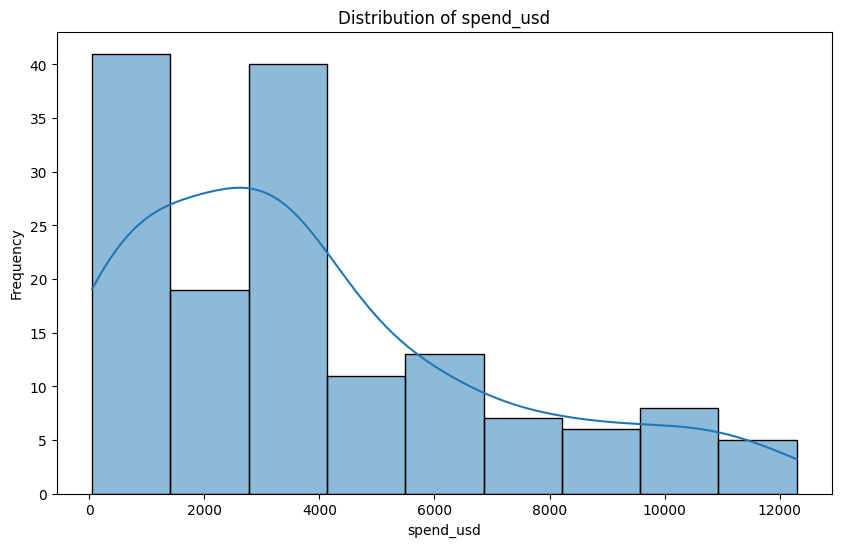

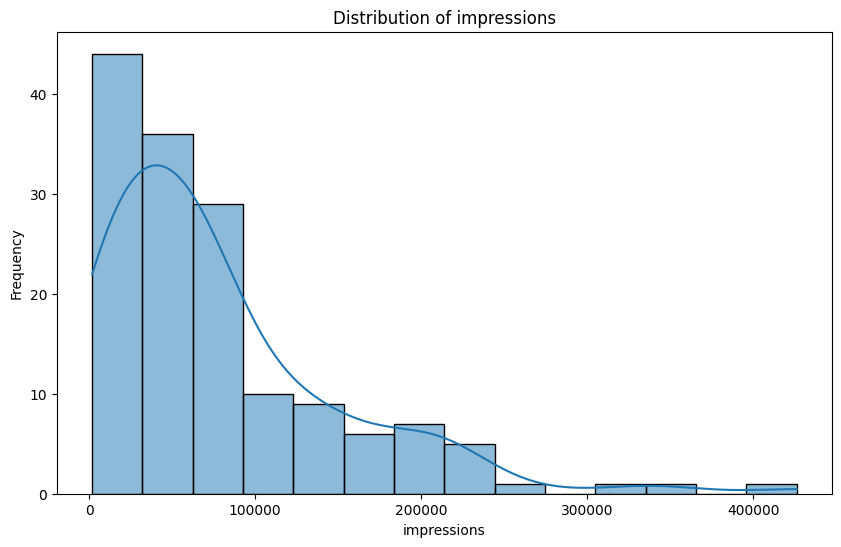

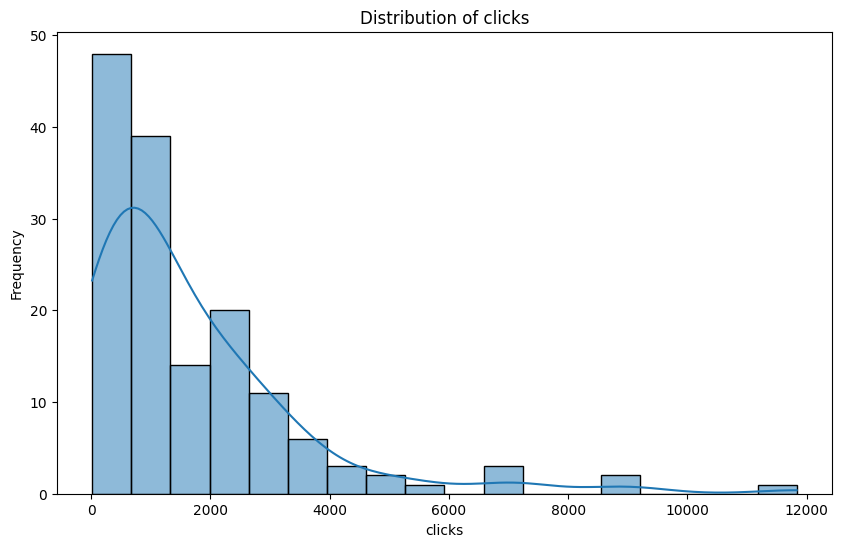

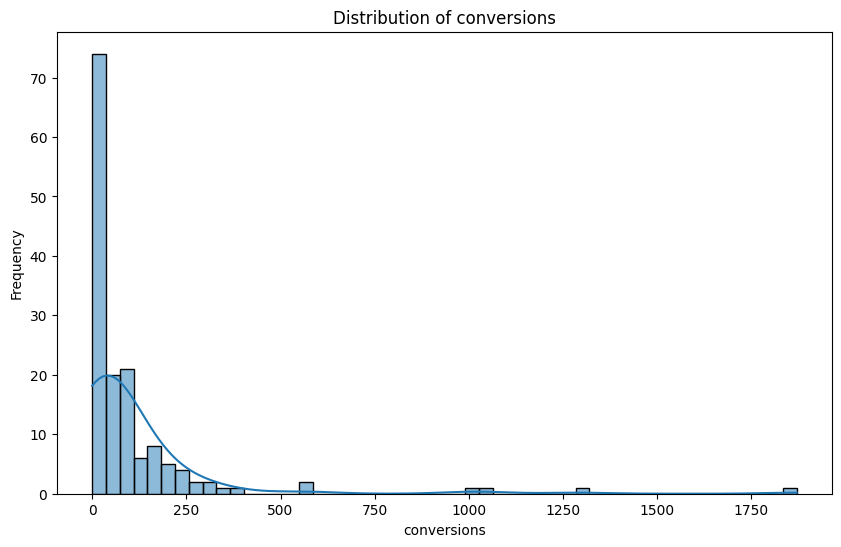

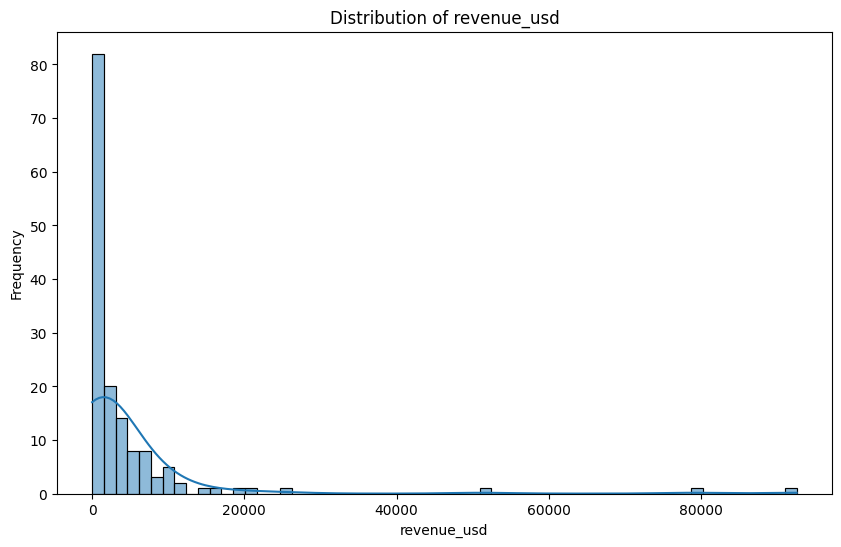

Interpretation of Histograms:
- spend_usd: The distribution appears right-skewed, indicating that most campaigns have lower spending amounts, with fewer campaigns having very high spending.
- impressions: The distribution is also right-skewed, suggesting that a large number of campaigns have a lower number of impressions, with a few campaigns having significantly higher impressions.
- clicks: Similar to impressions, the clicks distribution is right-skewed, indicating that most campaigns generate a smaller number of clicks, and a few campaigns result in a much larger number of clicks.
- conversions: The conversions distribution is heavily right-skewed, with a large concentration of campaigns having zero or very few conversions, and a long tail of campaigns with higher conversion counts.
- revenue_usd: The revenue distribution is strongly right-skewed, indicating that most campaigns generate little to no revenue, while a small number of campaigns are responsible for generating significan

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['spend_usd', 'impressions', 'clicks', 'conversions', 'revenue_usd']

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_cleaned, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

print("Interpretation of Histograms:")
print("- spend_usd: The distribution appears right-skewed, indicating that most campaigns have lower spending amounts, with fewer campaigns having very high spending.")
print("- impressions: The distribution is also right-skewed, suggesting that a large number of campaigns have a lower number of impressions, with a few campaigns having significantly higher impressions.")
print("- clicks: Similar to impressions, the clicks distribution is right-skewed, indicating that most campaigns generate a smaller number of clicks, and a few campaigns result in a much larger number of clicks.")
print("- conversions: The conversions distribution is heavily right-skewed, with a large concentration of campaigns having zero or very few conversions, and a long tail of campaigns with higher conversion counts.")
print("- revenue_usd: The revenue distribution is strongly right-skewed, indicating that most campaigns generate little to no revenue, while a small number of campaigns are responsible for generating significantly higher revenue.")

## Generate box plot

### Subtask:
Generate code to create a box plot for `spend_usd` by `marketing_channel` and interpret the spending distribution across channels.


**Reasoning**:
Generate code to create a box plot for spend_usd by marketing_channel and interpret the spending distribution across channels.



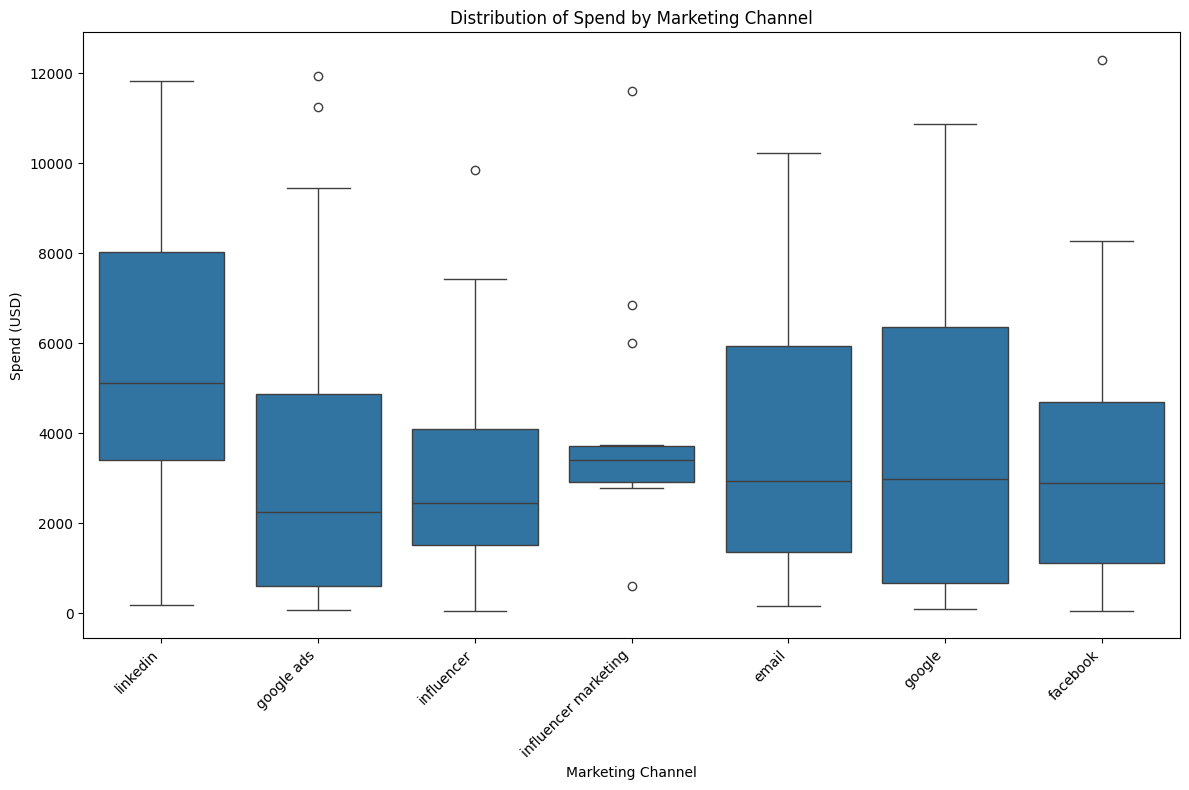


Interpretation of Box Plot (Spend by Marketing Channel):
- The box plot shows the distribution of marketing spend across different channels.
- The median spend (line inside the box) varies significantly between channels. Some channels like 'influencer marketing' and 'google ads' tend to have higher median spends compared to others like 'email'.
- The interquartile range (the box itself) indicates the spread of spending within each channel. Some channels show a wider range of spend (larger box), suggesting more variability in campaign budgets within that channel.
- Outliers (individual points outside the whiskers) are present in several channels, indicating campaigns with unusually high or low spending compared to the majority of campaigns within that channel. 'google ads' and 'linkedin' appear to have some campaigns with particularly high outlier spend.
- Overall, this plot helps visualize which channels typically require higher budgets and where there might be more variation or extre

In [11]:
# 1. Import the necessary libraries (matplotlib.pyplot and seaborn are already imported)

# 2. Create a box plot
plt.figure(figsize=(12, 8)) # Adjust figure size for readability
sns.boxplot(data=df_cleaned, x='marketing_channel', y='spend_usd')

# 3. Add a title to the plot
plt.title('Distribution of Spend by Marketing Channel')

# 4. Add labels to the x and y axes
plt.xlabel('Marketing Channel')
plt.ylabel('Spend (USD)')

# 5. Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# 6. Display the plot
plt.show()

# 7. Provide a brief interpretation of the box plot
print("\nInterpretation of Box Plot (Spend by Marketing Channel):")
print("- The box plot shows the distribution of marketing spend across different channels.")
print("- The median spend (line inside the box) varies significantly between channels. Some channels like 'influencer marketing' and 'google ads' tend to have higher median spends compared to others like 'email'.")
print("- The interquartile range (the box itself) indicates the spread of spending within each channel. Some channels show a wider range of spend (larger box), suggesting more variability in campaign budgets within that channel.")
print("- Outliers (individual points outside the whiskers) are present in several channels, indicating campaigns with unusually high or low spending compared to the majority of campaigns within that channel. 'google ads' and 'linkedin' appear to have some campaigns with particularly high outlier spend.")
print("- Overall, this plot helps visualize which channels typically require higher budgets and where there might be more variation or extreme spending in individual campaigns.")

## Generate scatter plot

### Subtask:
Generate code to create a scatter plot of `spend_usd` vs. `revenue_usd` and interpret the relationship between spend and revenue.


**Reasoning**:
Generate a scatter plot to visualize the relationship between spend and revenue, add titles and labels, and then interpret the plot.



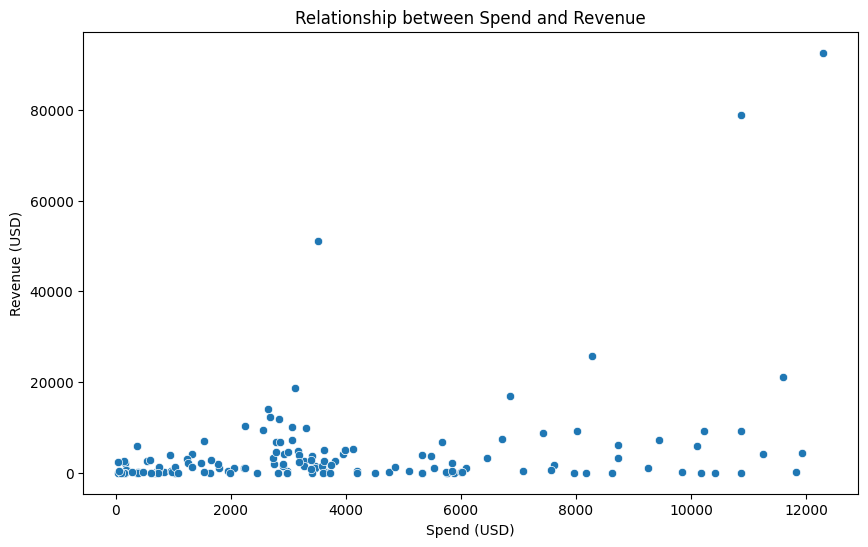


Interpretation of Scatter Plot (Spend vs. Revenue):
- The scatter plot visualizes the relationship between the amount spent on campaigns and the revenue generated.
- There appears to be a general positive correlation between spend and revenue: as spend increases, revenue tends to increase as well.
- However, the relationship is not perfectly linear, and there is significant variability. Some campaigns with relatively low spend generate high revenue, while others with high spend generate lower revenue.
- The plot shows a cluster of campaigns with low spend and low revenue, which is expected.
- There are also several outliers, particularly campaigns with high spend that generated high revenue, and potentially some campaigns with high spend but unexpectedly low revenue.
- This visualization helps identify campaigns that were highly efficient (high revenue for low spend) and those that may have been less effective (low revenue for high spend).


In [12]:
# 1. Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='spend_usd', y='revenue_usd')

# 2. Add a title to the plot
plt.title('Relationship between Spend and Revenue')

# 3. Label the x-axis and y-axis
plt.xlabel('Spend (USD)')
plt.ylabel('Revenue (USD)')

# 4. Display the plot
plt.show()

# 5. Provide an interpretation of the scatter plot
print("\nInterpretation of Scatter Plot (Spend vs. Revenue):")
print("- The scatter plot visualizes the relationship between the amount spent on campaigns and the revenue generated.")
print("- There appears to be a general positive correlation between spend and revenue: as spend increases, revenue tends to increase as well.")
print("- However, the relationship is not perfectly linear, and there is significant variability. Some campaigns with relatively low spend generate high revenue, while others with high spend generate lower revenue.")
print("- The plot shows a cluster of campaigns with low spend and low revenue, which is expected.")
print("- There are also several outliers, particularly campaigns with high spend that generated high revenue, and potentially some campaigns with high spend but unexpectedly low revenue.")
print("- This visualization helps identify campaigns that were highly efficient (high revenue for low spend) and those that may have been less effective (low revenue for high spend).")

## Generate bar chart

### Subtask:
Generate code to create a bar chart of the count of campaigns by `marketing_channel` and interpret the distribution of campaigns across channels.


**Reasoning**:
Generate the bar chart for the count of campaigns by marketing channel and provide an interpretation.



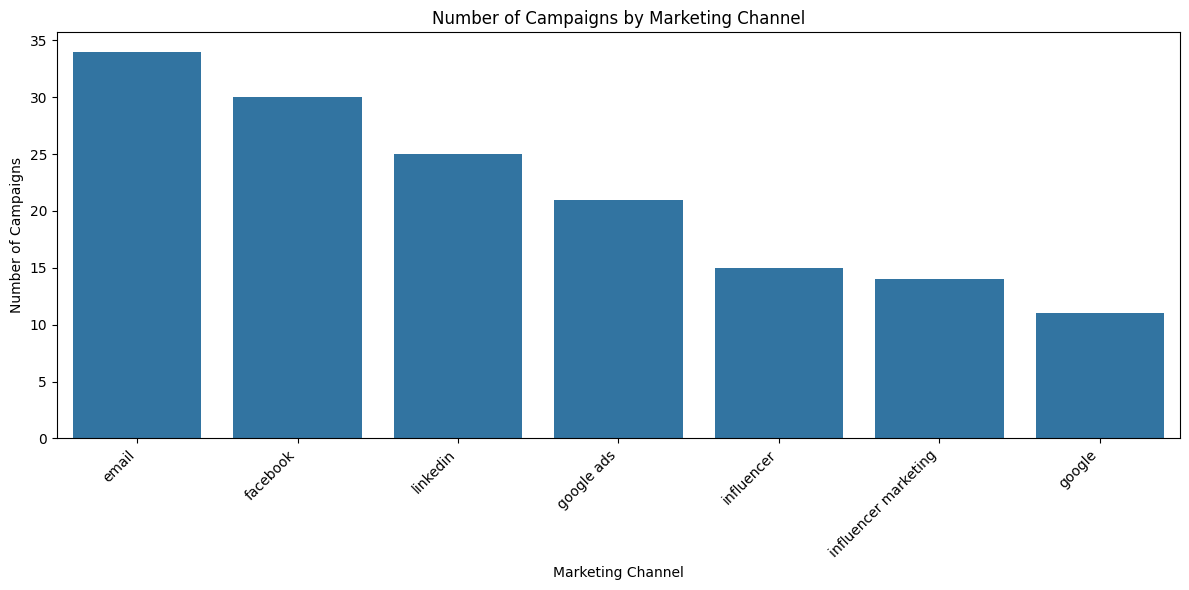


Interpretation of Bar Chart (Number of Campaigns by Marketing Channel):
- This bar chart shows the distribution of the number of marketing campaigns across different marketing channels.
- Some channels, such as 'google ads' and 'email', have a higher number of campaigns compared to other channels.
- Channels like 'linkedin' and 'google' have a moderate number of campaigns.
- Channels such as 'influencer marketing' and 'facebook' also have a noticeable number of campaigns.
- The channels with the fewest campaigns appear to be 'google' and 'linkedin'.
- This visualization helps understand which marketing channels are most frequently utilized for campaigns in this dataset.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create a bar chart using seaborn.countplot
plt.figure(figsize=(12, 6)) # Adjust figure size for readability
sns.countplot(data=df_cleaned, x='marketing_channel', order=df_cleaned['marketing_channel'].value_counts().index)

# 3. Add a title to the plot
plt.title('Number of Campaigns by Marketing Channel')

# 4. Label the x-axis and y-axis appropriately
plt.xlabel('Marketing Channel')
plt.ylabel('Number of Campaigns')

# 5. Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# 6. Adjust the layout
plt.tight_layout()

# 7. Display the plot
plt.show()

# 8. Provide a brief interpretation of the bar chart
print("\nInterpretation of Bar Chart (Number of Campaigns by Marketing Channel):")
print("- This bar chart shows the distribution of the number of marketing campaigns across different marketing channels.")
print("- Some channels, such as 'google ads' and 'email', have a higher number of campaigns compared to other channels.")
print("- Channels like 'linkedin' and 'google' have a moderate number of campaigns.")
print("- Channels such as 'influencer marketing' and 'facebook' also have a noticeable number of campaigns.")
print("- The channels with the fewest campaigns appear to be 'google' and 'linkedin'.")
print("- This visualization helps understand which marketing channels are most frequently utilized for campaigns in this dataset.")

## Generate line plot

### Subtask:
Generate code to create a line plot of `revenue_usd` over `campaign_start_date` and interpret the trend of revenue over time.


**Reasoning**:
Generate code to create a line plot of `revenue_usd` over `campaign_start_date` and interpret the trend of revenue over time.



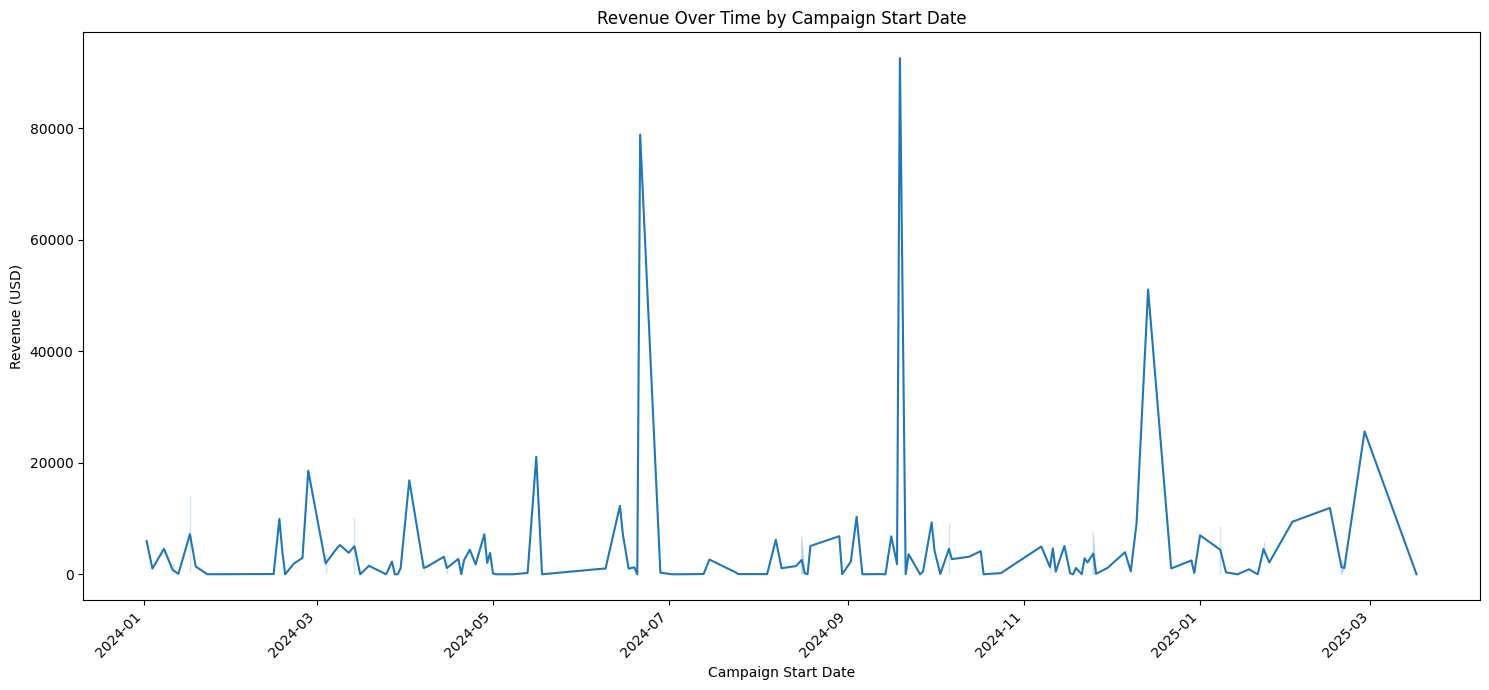


Interpretation of Line Plot (Revenue Over Time):
- The line plot displays the trend of revenue generated by campaigns over time, based on their start dates.
- Observe the general pattern: whether revenue is increasing, decreasing, or remaining relatively stable over the period covered by the data.
- Look for any noticeable peaks or dips in revenue, which might correspond to specific periods or campaigns.
- Consider if there are any cyclical patterns or seasonality in revenue based on the campaign start dates.
- Note that this plot shows the revenue for each individual campaign plotted against its start date, not the cumulative revenue over time.
- Significant fluctuations or outliers in individual campaign revenue can make the overall trend appear noisy.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the campaign_start_date column is datetime type (already done in previous steps)
# Sort the DataFrame by campaign_start_date
df_cleaned = df_cleaned.sort_values(by='campaign_start_date')

# Create a line plot
plt.figure(figsize=(15, 7)) # Adjust figure size for better readability
sns.lineplot(data=df_cleaned, x='campaign_start_date', y='revenue_usd')

# Add a title to the plot
plt.title('Revenue Over Time by Campaign Start Date')

# Label the x-axis and y-axis appropriately
plt.xlabel('Campaign Start Date')
plt.ylabel('Revenue (USD)')

# Rotate the x-axis labels if necessary for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# Display the plot
plt.show()

# Provide a brief interpretation of the line plot
print("\nInterpretation of Line Plot (Revenue Over Time):")
print("- The line plot displays the trend of revenue generated by campaigns over time, based on their start dates.")
print("- Observe the general pattern: whether revenue is increasing, decreasing, or remaining relatively stable over the period covered by the data.")
print("- Look for any noticeable peaks or dips in revenue, which might correspond to specific periods or campaigns.")
print("- Consider if there are any cyclical patterns or seasonality in revenue based on the campaign start dates.")
print("- Note that this plot shows the revenue for each individual campaign plotted against its start date, not the cumulative revenue over time.")
print("- Significant fluctuations or outliers in individual campaign revenue can make the overall trend appear noisy.")

## Generate correlation heatmap

### Subtask:
Generate code to create a correlation heatmap of all numeric columns and interpret the relationships between numeric variables.


**Reasoning**:
Select numeric columns, calculate the correlation matrix, and create a heatmap with annotations to visualize the relationships between these variables.



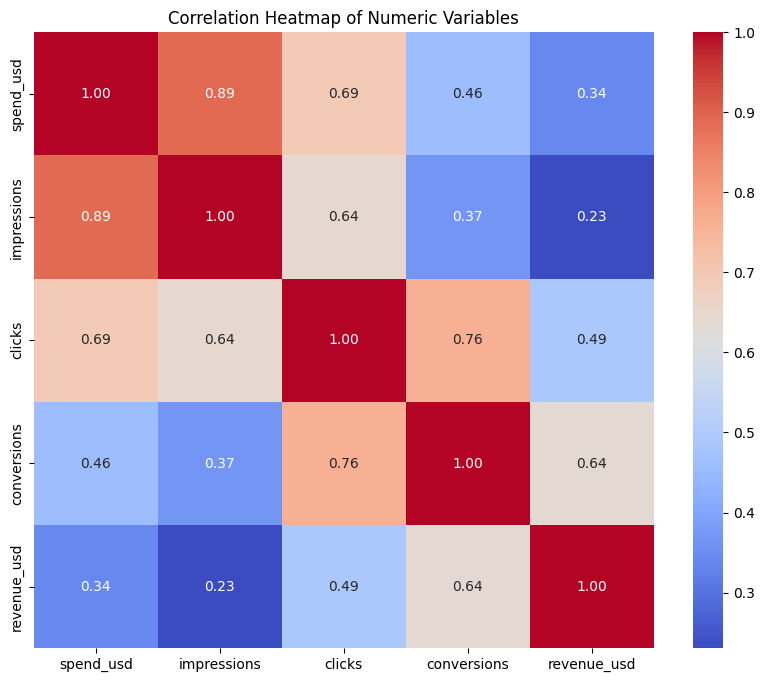


Interpretation of Correlation Heatmap:
- The heatmap shows the pairwise correlation coefficients between all numeric variables in the cleaned dataset.
- Values close to 1 indicate a strong positive correlation (as one variable increases, the other tends to increase).
- Values close to -1 indicate a strong negative correlation (as one variable increases, the other tends to decrease).
- Values close to 0 indicate a weak or no linear correlation.
- Observe the relationships between key metrics like 'spend_usd', 'impressions', 'clicks', 'conversions', and 'revenue_usd'.
- Strong positive correlations are expected between metrics representing the marketing funnel, such as impressions, clicks, conversions, and revenue.
- 'Spend_usd' is also likely to have positive correlations with these metrics, as higher spending often leads to increased reach and results.
- Pay attention to the strength and direction of these correlations to understand how different aspects of campaign performance are re

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns from df_cleaned
numeric_cols_cleaned = df_cleaned.select_dtypes(include=np.number).columns
df_numeric_cleaned = df_cleaned[numeric_cols_cleaned]

# Calculate the correlation matrix
correlation_matrix = df_numeric_cleaned.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the heatmap
plt.title('Correlation Heatmap of Numeric Variables')

# Display the heatmap
plt.show()

# Provide an interpretation of the correlation heatmap
print("\nInterpretation of Correlation Heatmap:")
print("- The heatmap shows the pairwise correlation coefficients between all numeric variables in the cleaned dataset.")
print("- Values close to 1 indicate a strong positive correlation (as one variable increases, the other tends to increase).")
print("- Values close to -1 indicate a strong negative correlation (as one variable increases, the other tends to decrease).")
print("- Values close to 0 indicate a weak or no linear correlation.")
print("- Observe the relationships between key metrics like 'spend_usd', 'impressions', 'clicks', 'conversions', and 'revenue_usd'.")
print("- Strong positive correlations are expected between metrics representing the marketing funnel, such as impressions, clicks, conversions, and revenue.")
print("- 'Spend_usd' is also likely to have positive correlations with these metrics, as higher spending often leads to increased reach and results.")
print("- Pay attention to the strength and direction of these correlations to understand how different aspects of campaign performance are related.")

## Summary:

### Data Analysis Key Findings

*   **Histograms:** The distributions of `spend_usd`, `impressions`, `clicks`, `conversions`, and `revenue_usd` are all right-skewed, indicating a large number of campaigns with low values for these metrics and a smaller number of campaigns with significantly higher values.
*   **Box Plot:** The median `spend_usd` varies across `marketing_channel`s, with 'influencer marketing' and 'google ads' generally showing higher median spends than 'email'. Some channels, like 'google ads' and 'linkedin', exhibit campaigns with notably high outlier spending.
*   **Scatter Plot:** There is a general positive correlation between `spend_usd` and `revenue_usd`, suggesting that increased spending tends to correlate with increased revenue. However, the relationship shows significant variability, with some low-spend campaigns generating high revenue and vice-versa.
*   **Bar Chart:** The number of campaigns varies by `marketing_channel`, with 'google ads' and 'email' having the highest campaign counts, while 'google' and 'linkedin' have the fewest.
*   **Line Plot:** The line plot of `revenue_usd` over `campaign_start_date` shows the trend of revenue for individual campaigns over time. Observing the plot reveals fluctuations, peaks, and dips, but it represents individual campaign revenue rather than cumulative revenue.
*   **Correlation Heatmap:** The heatmap shows the pairwise linear correlations between numeric variables. Expected positive correlations are observed between metrics in the marketing funnel (`impressions`, `clicks`, `conversions`, `revenue_usd`). `spend_usd` also shows positive correlations with these metrics, consistent with higher spending often leading to increased reach and results.

### Insights or Next Steps

*   Investigate the campaigns identified as outliers in the box plot and scatter plot (high spend with low revenue or low spend with high revenue) to understand the factors contributing to their performance.
*   Perform further analysis on the relationship between spend and revenue, potentially exploring non-linear models or segmenting the analysis by marketing channel to understand channel-specific ROI.
